Analyzing the results

In [23]:
import matplotlib.pyplot as plt

In [24]:
with open('formatted_results.csv', 'r', encoding="utf-8") as file:
    header = file.readline().strip().split(',')
    
    data = {'testLoop':{}, 'testNaive':{}, 'testStrassen':{}}
    
    for line in file:
        values = line.strip().split(',')
        key = values[0].split(':')[0].split('.')[1]
        if key not in data.keys():
            data[key] = {}
        
        measure = values[0].split(':')[1] if len(values[0].split(':')) > 1 else 'avgTime'

        if measure not in data[key]:
            data[key][measure] = {'size':[], 'score':[], 'error':[], 'units':[]}
        
        data[key][measure]['size'].append(values[1])
        data[key][measure]['score'].append(values[4])

        if(len(values)>6):
            data[key][measure]['error'].append(values[6])
            
        data[key][measure]['units'].append(values[-1])


In [25]:
for column, values in data.items():
    print(f'{column}: {values}')

testLoop: {'avgTime': {'size': ['10', '100', '500', '1000', '1500'], 'score': ['0.010', '7.374', '815.394', '8085.222', '124586.110'], 'error': ['0.007', '9.970', '418.487', '3354.868', '33527.114'], 'units': ['ms/op', 'ms/op', 'ms/op', 'ms/op', 'ms/op']}, '·gc.alloc.rate': {'size': ['10', '100', '500', '1000', '1500'], 'score': ['92.195', '11.225', '2.266', '0.925', '0.138'], 'error': ['68.528', '16.512', '1.006', '0.377', '0.036'], 'units': ['MB/sec', 'MB/sec', 'MB/sec', 'MB/sec', 'MB/sec']}, '·gc.alloc.rate.norm': {'size': ['10', '100', '500', '1000', '1500'], 'score': ['1016.091', '82023.757', '2010048.121', '8022965.600', '18035803.200'], 'error': ['0.036', '39.685', '13.052', '23640.444', '45765.475'], 'units': ['B/op', 'B/op', 'B/op', 'B/op', 'B/op']}, '·gc.churn.G1_Eden_Space': {'size': ['10', '100', '1000', '1500'], 'score': ['94.721', '11.223', '0.738', '0.487'], 'error': ['62.967', '59.175', '6.356', '4.191'], 'units': ['MB/sec', 'MB/sec', 'MB/sec', 'MB/sec']}, '·gc.churn.G1

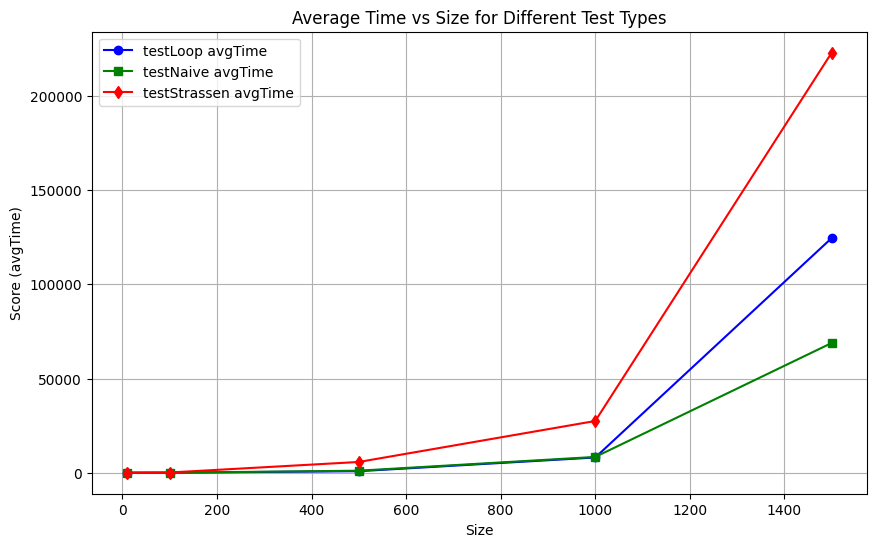

In [30]:
test_types = ['testLoop', 'testNaive', 'testStrassen']
markers = ['o', 's', 'd']  # Different markers for each test type
colors = ['b', 'g', 'r']  # Different colors for each test type

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop over each test type and plot the data
for test_type, marker, color in zip(test_types, markers, colors):
    sizes = [int(size) for size in data[test_type]['avgTime']['size']]
    scores = [float(score) for score in data[test_type]['avgTime']['score']]
    
    # Plot the data for this test type
    plt.plot(sizes, scores, marker=marker, linestyle='-', color=color, label=f'{test_type} avgTime')

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Score (avgTime)')
plt.title('Average Time vs Size for Different Test Types')
# plt.yscale('log')

# Add grid, legend, and display the plot
plt.grid(True)
plt.legend()
plt.show()